In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math
import random

# Problem 1
**What is a double-blind study? Why is it useful? What is the relationship between randomized control trials and double-blind studies?**

A double blind study is one in which neither the participants nor the experimenters know who is receiving a particular treatment. This procedure is utilized to prevent bias in research results, thus, it is useful for preventing bias due to demand characteristics or the placebo effect. A randomized control trial is a trial where participants are randomized into either an experimental group or a control group. The relationship between this and double-blind study is it blinds the participants from knowing which group they are in and what exactly they should be expecting in the experiment.

# Problem 2
**When can a Binomial Distribution be well approximated by a Poisson Distribution? What is the relationship between Poisson’s λ and Binomial’s N and p? Do you think the number of traffic deaths per day during Songkran festival is well approximated by a Poisson distribution? Why or why not?**

When $n$ is large and $p$ is small, then the Poisson distribution is well approximated. In fact, is $n > 50$ and $np < 5$, then the Poisson distribution has a good approximation. <br> Poisson's $\lambda$ represents the average number of successes per time period. Binomial's $N$ represents the number of trials performed and $p$ represents the probability of success. This means $np$ is the number, or average number, of successful trials per time period. We can also say Poisson's $\lambda$ is equal to Binomial's $np$. <br> Based on the statistics from last year, out of 3442 injured people, 386 people died. The probability of an injured person dying is approximately 0.11. Assuming $n$ is 1000, so $np = 110$, which violates the condition for a well approximated Poisson distribution. Thus, it is not a well approximated distribution.

# Problem 3
**During Thailand's holiday seasons such as New Year or Song Kran, traffic deaths seem to increase. If the average number of traffic deaths per day is 30 for non-holidays and is 35 for holidays, do you think there's an actual difference between non-holiday and holiday death rate? Why? Would your conclusion change if the holiday death rate is 40?**

Null hypothesis: $H_0: \mu_1 = \mu_2$ <br>
Alternative hypothesis: $H_a: \mu_1 \neq \mu_2$ <br>
We assume $\alpha = 0.05$ <br>
We also assume Songkran as the only holiday, which spans 5 days, while the remaining 360 days are non-holidays.

In [133]:
from scipy import stats

a = np.random.randn(360) + 30 #sample for non-holiday
b = np.random.randn(5) + 35 #sample for Songkran holiday

t = (np.mean(a) - np.mean(b))/np.sqrt(np.std(a)**2/360 + np.std(b)**2/5)

df = 5-1

p = stats.t.cdf(t, df=df)
print("The p-value when holiday death rate = 35 is {:.11f}".format(p))

#holiday death rate 40
c = np.random.randn(5) + 40 #rate 40 for holiday death rate

t_40 = (np.mean(a) - np.mean(c))/np.sqrt(np.std(c)**2/360 + np.std(c)**2/5)
df_40 = 5-1
p_40 = stats.t.cdf(t, df=df)
print("The p-value when holiday death rate = 40 is {:.11f}".format(p))


The p-value when holiday death rate = 35 is 0.00066970350
The p-value when holiday death rate = 40 is 0.00066970350


As we can see, the p-value is < $\alpha$. This means that there is a low possibility for the null hypothesis to be true. Thus, we reject the null hypothesis, meaning that there is a difference between non-holiday and holiday death rate. The same is also true for holiday death rate of 40.

# Problem 4
**Find out what homeopathy is. Why is its effectiveness exactly like placebo's?**

Homeopathic is a medical system based on the belief that the body can cure itself. Standing by the policy that "likes cure like," the doctors would mix small doses of substances with diluted water or alcohol that causes the same symptom(s) as the patient's symptom(s) and present to the patients. Some examples of those substances are flowers that can cause fever to cure fever, or bee's venom that causes itchiness to cure itchiness. The mixture of these substances with diluted water or alcohol helps weaken the potent of these substances when patients ingest them; the purpose of ingesting this is to have the body fight back the symptoms or illnesses naturally rather than using chemicals. However, it has been proven that homeopathy actually has no effect on the patient's recovery at all. This can be classified as a placebo since the patients truly believe that homeopathy can cure them when in actuality, homeopathy has no actual influence on the recovery of the body physically.

# Problem 5
**Estimate the number of cumulative Covid-19 patients for the world and for Thailand on April 30, 2020. Please do some research on how we predict the number of epidemic/pandemic cases before estimating.**

In [45]:
R0 = 2.25 #2 - 2.5 (basic reproduction number) as of February 28, 2020
i = 5 #incubation period (in days)

base_case = 84615 #as of February 28, 2020
incubation_periods = 62//i

# R0 = np.random.normal(2.5, 1, 100000)
# i = np.random.normal(14, 9, 100000)
new_cases = (1-R0**incubation_periods)/(1-R0)
# 1 + R0 + R0^2 + .... + R0^i-1, where i is the total incubation period

print("Estimated number of cumulative Covid-19 patients on April 30, 2020 for each country is {:.2f} cases"
      .format(base_case + new_cases))

Estimated number of cumulative Covid-19 patients on April 30, 2020 for each country is 98081.49 cases


# Problem 6
**A man is trying to measure the height of a tree using geometry by aiming a laser pointer from the eye level to the top of the tree. The man stands 10.0 ± 1.0 m away from the base of the tree. His eyes are 1.65 ± 0.05 m above the ground. The angle 𝜽 is 30 ± 3 degrees. What is the height of the tree with its uncertainty? (Hint: Estimating uncertainty with Numpy sampling is very easy. Also, don't forget degree-radian conversion. )** 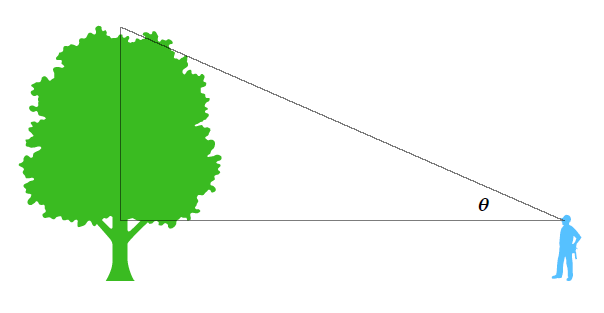

In [134]:
base = np.random.normal(10, 1, 100000)
eye_height = np.random.normal(1.65, 0.05, 100000)
angle_deg = np.random.normal(30, 3, 100000)
angle_rad= angle_deg*np.pi/180

#tan𝜽 = opposite/adjacent
tree_height_from_eye = base*np.tan(angle_rad)
tree_height = eye_height + height_from_eye

print("The height of the tree is {:.2f} ± {:.2f} m"
      .format(np.mean(tree_height), np.std(tree_height)))

The height of the tree is 7.44 ± 0.91 m
